# Programa base para realização de experimentos

## Código Base

### Bibliotecas

In [128]:
import numpy as np
from time import time
from matplotlib import pyplot as plt
from IPython.display import clear_output, display, Markdown, Latex

### Parametros do experimento

### Código de repetição do experimento

In [130]:
class Experiment:
    def __init__(self, repetitions, data_quantity):
        r = 600        # Número de repetições do experimento
        n = 10 ** 6     # Quantidade do dado
        
        self.repetitions = repetitions
        self.data_quantity = data_quantity
        self.results = []         #T
        self.variability = []     #V
        self.mean = []            #M
        self.std_deviation = []   #S
        
    
    def run_experiment(self, experiment_function):
        for i in range(self.repetitions):
            tic = time()
            # Run the experiment function
            for j in range(self.data_quantity):
                experiment_function()
            tac = time()
            self.results.append(tac - tic)
            self.std_deviation.append(np.std(self.results))
            self.mean.append(np.mean(self.results))
            self.variability.append(np.std(self.results) / np.mean(self.results))
            clear_output(wait=True)
            print("Processing data... {:.2%}".format((i + 1) / self.repetitions))
        display(Markdown("<center><h2><font color='green'>Terminou!</font></h2></center>"))

    @staticmethod
    def plot_title(title="", additional_title=""):
        if additional_title:
            title += f' - {additional_title}'
        plt.title(title)
        
    @staticmethod
    def show_bar_plot(experiment, additional_title=""):
        plt.bar(range(experiment.repetitions), experiment.results)
        plt.xlabel('Experiment')
        plt.ylabel('Time (s)')
        Experiment.plot_title("Experiment result", additional_title)
        plt.show()

    @staticmethod
    def setup_histogram(experiment):
        plt.hist(experiment.results, bins=20)
        plt.xlabel('Time')
        plt.ylabel('Frequency')

    @staticmethod
    def show_histogram(experiment, additional_title=""):
        plt.figure(figsize=(5,3))
        Experiment.setup_histogram(experiment)
        Experiment.plot_title("Histogram", additional_title)
        plt.grid()
        plt.show()

    @staticmethod
    def show_histograms_side_by_side(experiment1, experiment2, additional_title="", legend=""):
        plt.figure(figsize=(5,3))
        Experiment.setup_histogram(experiment1)
        Experiment.setup_histogram(experiment2)
        plt.legend(legend)
        Experiment.plot_title(additional_title)
        plt.grid()
        plt.show()
        
    @staticmethod
    def show_variability_plot(experiment, additional_title=""):
        plt.figure(figsize=(5,3))
        plt.plot(experiment.variability)
        plt.xlabel('Experiments')
        plt.ylabel('Average Time')
        Experiment.plot_title("Variability", additional_title)
        plt.grid()
        plt.show()

    @staticmethod
    def show_variability(experiment, title=""):
        std_deviation = np.std(experiment.results)
        mean = np.mean(experiment.results)
        variability = std_deviation/mean
        display(Markdown("<center><h2>" + title +"</h2></center>"))
        display(Markdown("<center><h3>" + "{:}".format(variability) +"</h3></center>"))

    @staticmethod
    def show_mean_deviation_plot(experiments, additional_title="", step=0.05):
        plt.plot(experiments.mean)
        plt.plot(experiments.std_deviation)
        plt.yticks(np.arange(0, max(experiments.results) + step, step))
        Experiment.plot_title("Mean vs Deviation", additional_title)
        plt.grid()
        plt.legend(["Mean", "Standard Deviation"])
        plt.show()

    def setup_scatter(experiment, color_variable):
        experiment_mean = np.mean(experiment.results)
        plt.plot(range(r), experiment.results, color_variable + '.')
        plt.xlabel('Experiment Repetition')
        plt.ylabel('Time of '+str(n)+' expl. attrib.')

    @staticmethod
    def show_scatter_plot(experiment, color_variable, additional_title=""):
        plt.figure(figsize=(5,3))
        Experiment.setup_scatter(experiment, color_variable)
        Experiment.plot_title("Scatter plot", additional_title)
        plt.grid()
        plt.show()

    @staticmethod
    def show_scatter_plot_side_by_side(experiment1, experiment2, color_variable1, color_variable2, legend1, legend2, additional_title=""):
        plt.figure(figsize=(5,3))
        
        Experiment.setup_scatter(experiment1, 'b')
        Experiment.setup_scatter(experiment2, 'r')

        Experiment.plot_title("Scatter plot", additional_title)
        
        plt.legend(["atrib. expl."+ legend1 + " Tmedio ={:.3g}".format(np.mean(experiment1.results))+"seg",
                   "atrib. expl." + legend2 + " Tmedio ={:.3g}".format(np.mean(experiment2.results))+"seg"])
        
        plt.xlabel('Experiment Repetition')
        plt.ylabel('Time of '+str(n)+' expl. attrib.')
        plt.grid()
        plt.show()

    

## Experimentos

In [131]:
# Define your experiment functions
def experiment_1():
    1 > 1
        
# Create Experiment objects
experiment_1_obj = Experiment(repetitions=r, data_quantity=n)

# Run experiments
experiment_1_obj.run_experiment(experiment_1)

Processing data... 100.00%


<center><h2><font color='green'>Terminou!</font></h2></center>

In [132]:
# Define your experiment functions
def experiment_2():
    1 < 1

# Create Experiment objects
experiment_2_obj = Experiment(repetitions=r, data_quantity=n)

# Run experiments
experiment_2_obj.run_experiment(experiment_2)

Processing data... 100.00%


<center><h2><font color='green'>Terminou!</font></h2></center>

## Gráficos para demonstrar resultados

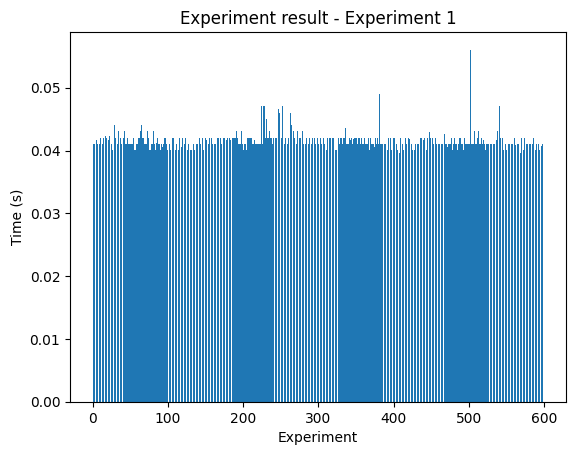

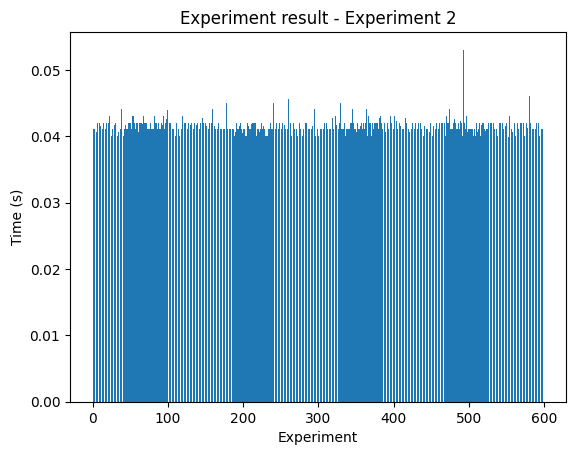

In [133]:
Experiment.show_bar_plot(experiment_1_obj, "Experiment 1")
Experiment.show_bar_plot(experiment_2_obj, "Experiment 2")

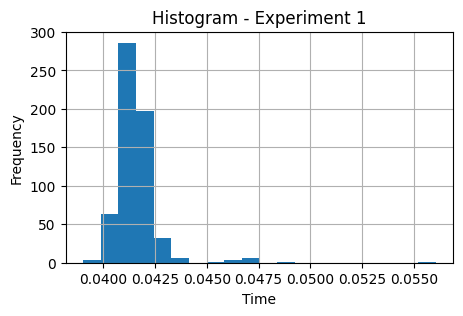

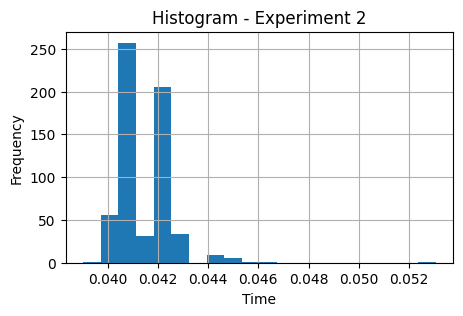

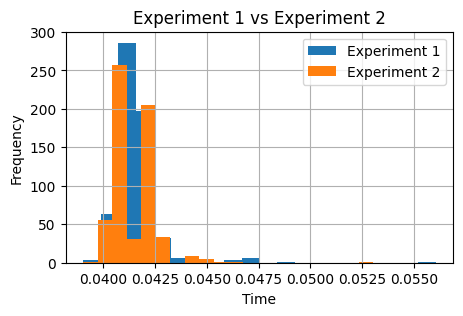

In [134]:
# Show the histogram for Tc
Experiment.show_histogram(experiment_1_obj, "Experiment 1")

# Show the histogram for Tv
Experiment.show_histogram(experiment_2_obj, "Experiment 2")

# Show both histograms side by side
Experiment.show_histograms_side_by_side(experiment_1_obj, experiment_2_obj, "Experiment 1 vs Experiment 2", ["Experiment 1", "Experiment 2"])

### Teste da Variabilidade

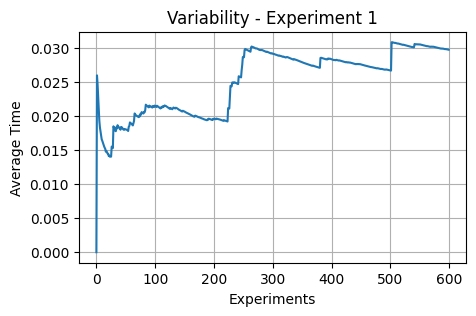

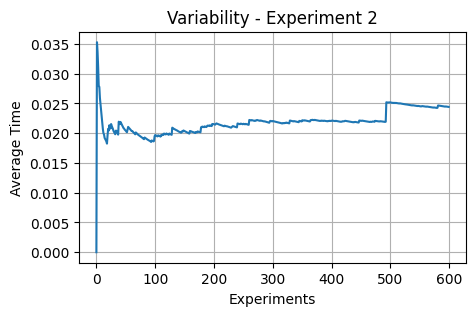

In [135]:
Experiment.show_variability_plot(experiment_1_obj, "Experiment 1")
Experiment.show_variability_plot(experiment_2_obj, "Experiment 2")

In [136]:
Experiment.show_variability(experiment_1_obj, "Variability - Experiment 1")
Experiment.show_variability(experiment_2_obj, "Variability - Experiment 2")

#Calculo da variabilidade para checar se a maquina é estavel para os experimentos. Idealmente precisa estar abaixo de .15

<center><h2>Variability - Experiment 1</h2></center>

<center><h3>0.029723263396186927</h3></center>

<center><h2>Variability - Experiment 2</h2></center>

<center><h3>0.024414743201331794</h3></center>

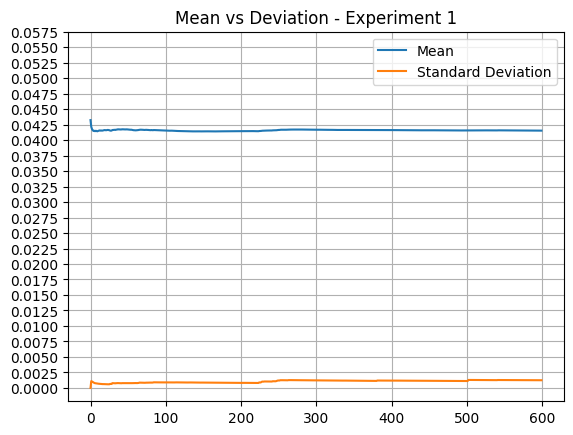

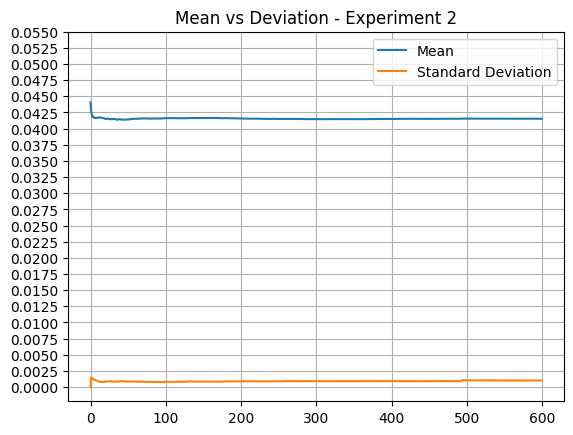

In [137]:
Experiment.show_mean_deviation_plot(experiment_1_obj, "Experiment 1", 0.0025)
Experiment.show_mean_deviation_plot(experiment_2_obj, "Experiment 2", 0.0025)

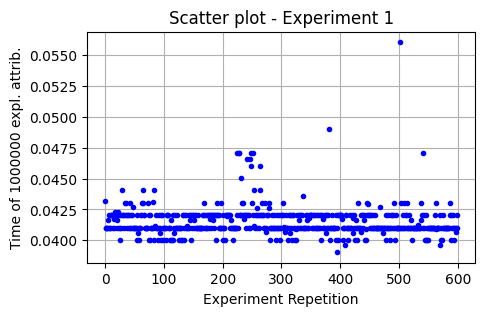

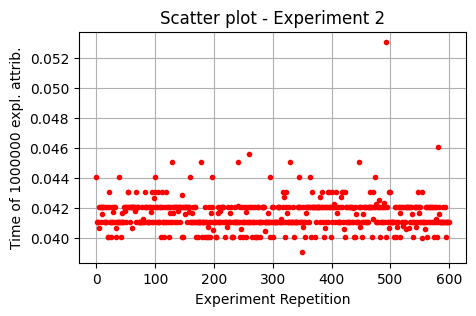

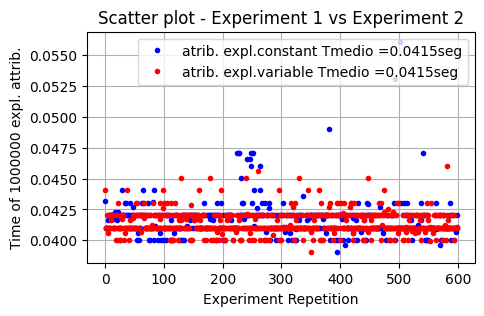

In [138]:
Experiment.show_scatter_plot(experiment_1_obj, 'b', "Experiment 1")
Experiment.show_scatter_plot(experiment_2_obj, 'r', "Experiment 2")

Experiment.show_scatter_plot_side_by_side(experiment_1_obj, experiment_2_obj, 'b', 'r', "constant", "variable","Experiment 1 vs Experiment 2")